# Bevezetés a scipy csomgba és további numpy függvények 

A [scipy](https://www.scipy.org/) egy numpy-on alapuló python csomag, mely rengeteg, néhány esetben numpy-ban is megtalálható, funkciót implementál. Elsősorban jelfeldolgozó, numerikus integráló és optimalizáló algoritmusok, speciális függvények (pl. Bessel-függvény) találhatóak meg benne.

A [scipy.io](https://docs.scipy.org/doc/scipy/reference/tutorial/io.html) alcsomag segítségével lehetséges Matlab által írható és olvasható bináris fájlok (`*.mat` fájlok) írása olvasása, így a Pythonban kiszámított eredmények könnyen exportálhatóak és tovább lehet velük dolgozni Matlabban, és fordítva.

## Mátrixok és vektorok létrehozása

A numpy jegyzetben láttuk, hogyan lehet a numpy-ban mátrixot vagy vektort létrehozni:

In [1]:
import numpy as np

In [4]:
a = np.array((1,2,3))
a

array([1, 2, 3])

A mátrixok, vektorok létrehozásához és összefűzéséhez a numpy biztosít egy alternatív módszert, ami valamelyest hasonlít a Matlab-ban már megszokott szintaxishoz. A fenti vektort a következőképpen is létre lehet hozni:  

In [12]:
# sorvektor
b = np.r_[1,2,3]
b, b.shape

(array([1, 2, 3]), (3,))

In [11]:
# oszlopvektor
c = np.c_[1,2,3]
c, c.shape

(array([[1, 2, 3]]), (1, 3))

A fenti módszer segítségével mátrixokat is létre tudunk hozni:

Két vektor össefűzése mátrixszá oszlopok mentén

In [29]:
np.c_[(1,2,3), (4,5,6)]

array([[1, 4],
       [2, 5],
       [3, 6]])

Két vektor össefűzése sorvektorrá

In [28]:
np.r_[(1,2,3), (4,5,6)]

array([1, 2, 3, 4, 5, 6])

Két vektor össefűzése sorvektorrá és float-á konvertálása:

In [24]:
np.r_[(1,2,3), (4,5,6)].astype(float)

array([1., 2., 3., 4., 5., 6.])

Korábban definiált változók is felhasználhatóak.

In [33]:
a, b

(array([1, 2, 3]), array([1, 2, 3]))

In [34]:
np.r_[a, b]

array([1, 2, 3, 1, 2, 3])

In [35]:
np.c_[a, b]

array([[1, 1],
       [2, 2],
       [3, 3]])

Egyenlő lepésközű vektor létrehozása (`j` a komplex egység - jelen esetben azt jelzi, hogy 10 elemet kell tartalmazzon a létrejövő vektor):

In [43]:
np.r_[0:10:10j]

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [48]:
# oszlopvektor formátum
np.c_[0:5:6j]

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

## FFT (Fast Fourier Transform) azaz Gyors Fourier-transzformáció

Bizonyára találkoztatok, már a FT-vel (Fourier-transzformációval), annak elméletével, gyakorlati hasznával. Markáns periodicitást egy adatsorban a FT segítségével detektálhatunk. Nagy frekvenciás zajok kiszúrése, az adatsorunk konvolúciója egy adott függvénymaggal, mind a FT segítségével tehető meg.

Nézzünk meg, hogyan lehet a scipy segítségével elvégezni ezt a transzformációt.

In [58]:
from scipy import fftpack as fft
import matplotlib.pyplot as plt

### Szintetikus példa

Először készítsünk egy szintetikus adatsort. Az adatsort a $g(x) = C + A_1 sin(2 \pi f_1 x) + A_2 sin(2 \pi f_2 x)$ függvény mintavételezésével fogjuk elkészíteni.

In [66]:
# f_1 és f_2 frekvencia
fr = np.r_[5, 10]
fr

array([ 5, 10])

In [68]:
# körfrekvenciák
fr * 2 * np.pi

array([31.41592654, 62.83185307])

In [67]:
# a g függvény implementációja
def two_sin(x, a, c, f):
    return c + a[0] * np.sin(2 * np.pi * f[0] * x) + a[1] * np.sin(2 * np.pi * f[1] * x)

In [147]:
# x és y = g(x) értékek előállítása
x = np.r_[0:2 * np.pi:1000j]
c = 2.5
y = two_sin(x, c=c, f=fr, a=(1.5, 1.0))

A függvény mintevételezési frekvenciája a lépésköz inverze. (Késöbb érdekes lesz.)

In [126]:
fs = 1 / (x[1] - x[0])
fs

158.99578814880346

In [120]:
# segédfüggvény
def plotxy(*args, xlabel="x", ylabel="y", title="", dpi=150, size=(5,3), xrange=None, yrange=None):
    f = plt.figure(dpi=dpi, figsize=size)

    plt.plot(*args)
    
    if xrange is not None:
        plt.xlim(xrange)

    if yrange is not None:
        plt.ylim(yrange)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

A $g(x)$ függvény ábrázolva:

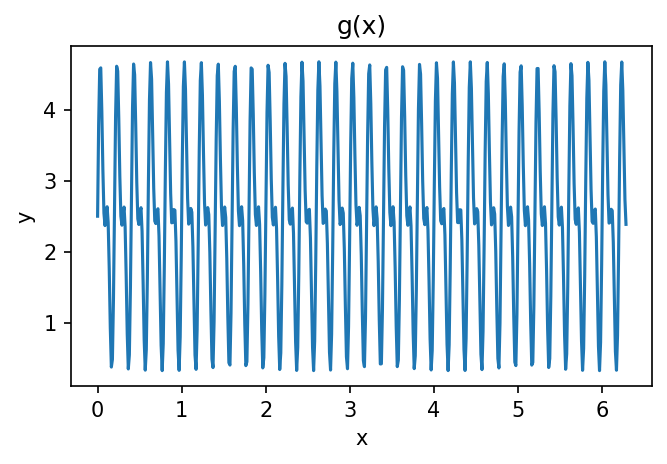

In [133]:
plotxy(x, y, title="g(x)")

A függvényértékek átlaga értelemszerűen a konstans $C$ értékéhez közeli.

In [149]:
y.mean(), c

(2.515313736103926, 2.5)

Hajtsuk végre a transzformációt.

In [118]:
yy = fft.fft(y)

Az $y$ értékek transzformálása után hozzuk létre a transzformált $y$ értékekhez tartozó frekvencia értékeket. Ezt az `fftfreq` függvény segítségével tehetjük meg.

In [119]:
xx = fft.fftfreq(
    yy.shape[0], # transzformált értékek darabszáma
    1 / fs       # eredeti értékek mintavételezési lépésköze 
)

Transzformált értékek abszolút értéke ábrázolva. (A FT általános esetben egy komplex számokat tartalmazó vektort eredényez, ennek most csak az abszolút értékét ábrázoljuk.)

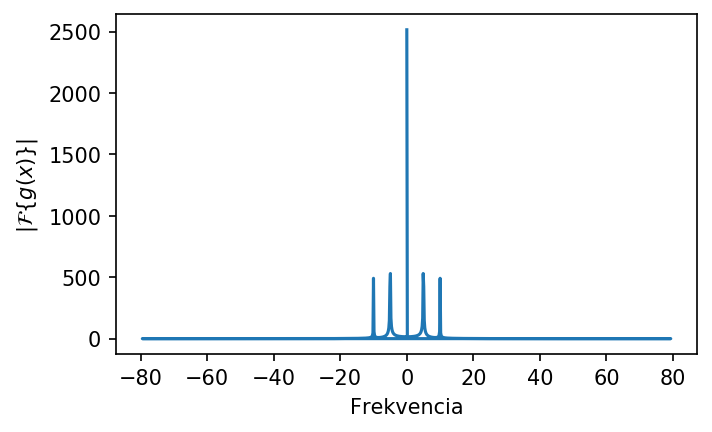

In [124]:
plotxy(xx, np.abs(yy), "-", xlabel="Frekvencia", ylabel=r"$|\mathcal{F}\{g(x)\}|$");

Nagyított ábra.

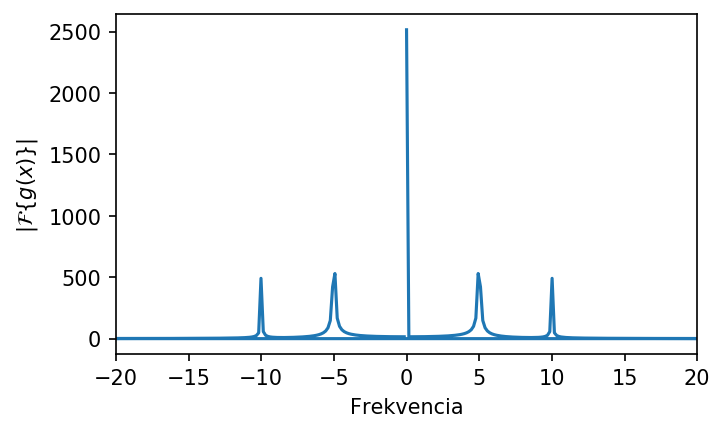

In [115]:
plotxy(xx, np.abs(yy), xlabel="Frekvencia", ylabel=r"$|\mathcal{F}\{g(x)\}|$", xrange=(-20, 20));

In [116]:
fr

array([ 5, 10])

Láthatjuk, hogy a transzformált értékek csúcsai az eredeti frekvencia-értékekkel egybeesnek. A FT egy másik tulajdonságát is megfigyelhetjük. A frekvencia-spektrum szimmetrikus.

Esetünkben a mintavételezési frekvencia nagyobb volt mint a mintavételezett függvény legnagyobb frekvenciájú "elem" frekvenciájának kétszerese, így a frekvencia spektrum rekonstruálható volt.

In [127]:
print("Mintavételezési frekvencia: %g.\nA két frekvencia közül a nagyobbnak a kétszerese: %g" %
      (fs, max(fr) * 2 * 2 * np.pi))

Mintavételezési frekvencia: 158.996.
A két frekvencia közül a nagyobbnak a kétszerese: 125.664


### Rövid kitérő: tetszőleges számú függvényargumentum

Definiáljunk egy segédfüggvényt. Ez a függvény a kapott $x$ és $y$ adatsort ábrázolja, végrehajtja a FT-t és ábrázojla annak eredményét. A `plotxy` függvény számos opcionális argumentumát szeretnénk továbbítani az fft_plot függvényen belül a `plotxy` függvénynek.

Megtehetnénk azt, hogy bemásoljuk ezeket az opcionális argumentumokat az `fft_plot` függvény argumentum listájába és továbbítjuk őket a `plotxy` függvénynek:

In [153]:
def fft_plot(x, y, xlabel="x", ylabel="y", title="", dpi=150, size=(5,3), xrange=None, yrange=None):
    # ...
    plotxy(x, y, xlabel=xlabel, ylabel=ylabel, title=title, dpi=dpi, size=size, xrange=xrange, yrange=yrange)
    # ...

Ez a módszer viszont elég körülményes, könnyű hibát vele elkövetni. Ráadásul, ha több késöbb opcionális argumentumot adunk a `plotxy` függvénynek, akkor szükségessé válik az `fft_plot` függvény argumentum listájának megváltoztatása.

Ehelyett alkalmazhatjuk a következő szintaxist:

In [150]:
def fft_plot(x, y, **kwargs):
    dx = (x[1] - x[0])
    fs = 1 /dx
    
    yy = fft.fft(y)
    xx = fft.fftfreq(yy.shape[0], dx)
    
    plotxy(xx, yy, **kwargs)

Ebben az esetben a `kwargs` jelöli a tetszőleges számú opcionális argumentumot. A két csillag jelzi, hogy opcionális argumentumokról van szó. Hasonlóan egy darab csillaggal jelölhet 0 vagy több argumentum. Lássunk erre egy példát.

In [155]:
def multi(*args, **kwargs):
    print("args: ", args)
    print("kwargs: ", kwargs)

In [156]:
multi()

args:  ()
kwargs:  {}


Itt egy darab opcionális vagy tetszőleges mennyiségű argumentumot se adtunk át a függvénynek.

In [157]:
multi(1.0)

args:  (1.0,)
kwargs:  {}


A fenti esetben egy darab argumentumot adtunk át a függvénynek.

In [158]:
multi(1.0, "two")

args:  (1.0, 'two')
kwargs:  {}


Itt pedig két darab argumentumot.

In [159]:
multi(1.0, "two", a="a", b="b")

args:  (1.0, 'two')
kwargs:  {'a': 'a', 'b': 'b'}


Az utolsó példánál pedig két darab opcionális argumentumot is megadtunk.

Az `args` és `kwargs` egy tuple és dict segítségével tárolják az argumentumokat. Erről meg is bizonyosodhatunk:

In [161]:
def multi_types(*args, **kwargs):
    print("args: %s; kwargs: %s" % (type(args), type(kwargs)))

In [162]:
multi_types(1.0, "two", a="a", b="b")

args: <class 'tuple'>; kwargs: <class 'dict'>


Ha van egy korábban definiált list vagy tuple, illetve dictionary objektumunk, akkor a következőképpen tudjuk őket átadni a `multi` függvényünknek:

In [163]:
a = (1.0, 2.0)
kw = {"a": "A", "b": "B"}
multi(*a, **kw)

args:  (1.0, 2.0)
kwargs:  {'a': 'A', 'b': 'B'}


Tehát az opcionális argumentumok működése a háttérben dictionary objektumok segítségével történik.

### Függvény alulmintevételezése

Tekintsünk egy olyan esetet, ahol ez a feltétel ([Nyquist-Shannon mintevételezési szabály](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem)) nem teljesül.

In [141]:
# x és y = g(x) értékek előállítása
x = np.r_[0:2 * np.pi:500j]
y = two_sin(x, c=2.5, f=fr, a=(1.5, 1.0))

fs = 1 / (x[1] - x[0])
fs

79.41831660285578

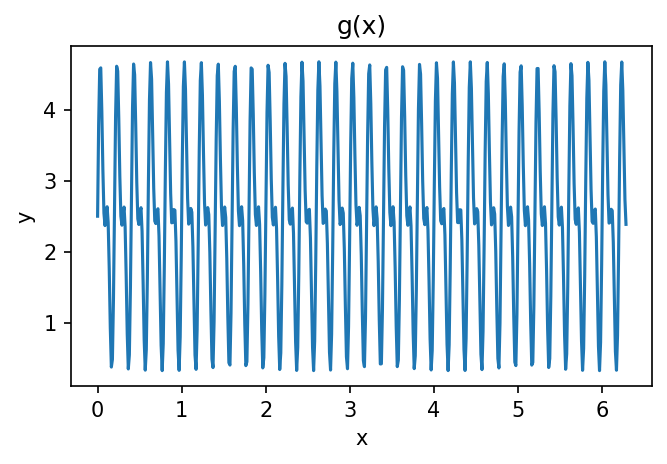

In [142]:
plotxy(x, y, title="g(x)")

In [143]:
print("Mintavételezési frekvencia: %g.\nA két frekvencia közül a nagyobbnak a kétszerese: %g" %
      (fs, max(fr) * 2 * 2 * np.pi))

Mintavételezési frekvencia: 79.4183.
A két frekvencia közül a nagyobbnak a kétszerese: 125.664


In [144]:
yy = fft.fft(y)
xx = fft.fftfreq(yy.shape[0], 1 / fs)

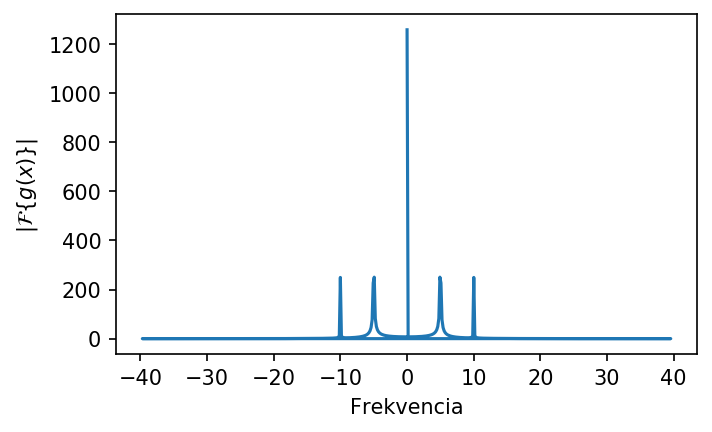

In [145]:
plotxy(xx, np.abs(yy), "-", xlabel="Frekvencia", ylabel=r"$|\mathcal{F}\{g(x)\}|$");

Láthatjuk, hogy ebben az esetben nem sikerült a frekvenci-spektrumot helyreállítani, az alacsony mintavételezési frekvencia következtében a magasabb frekvenciák elvesztek.

## Numerikus integrálás

Tekintsünk meg egy példát a numerikus integrálásra. Egy adatsor numerikus integrálására szükségünk lehet, ha nem tudjuk egy függvény integrálását analitikusan elvégezni vagy egy teszőleges adatsort integrálását kell elvégeznünk.

In [146]:
from scipy import integrate as itg

Először szmítsuk ki egy ismert függvény (proprius) integrálját.

In [44]:
def sin(x, a, freq, phase):
    return a * np.sin(freq * x + phase)

In [55]:
sin_int = itg.quad(sin, 0, 2 * np.pi, args=(2.0, 0.5, 0.00))
sin_int

(8.0, 8.881784197001252e-14)

In [61]:
def pol(x, c):
    return c[0] + c[1] * x + c[2] * x * x

In [59]:
pol(np.array([1.0, 3.0]), [1.0, 2.0, 3.0])

array([ 6., 34.])

In [63]:
c = [0.0, 1.0, -3.0]
c

[0.0, 1.0, -3.0]

In [64]:
itg.quad(pol, -1.0, 1.0, args=(c))

(-2.0, 2.258374703025784e-14)

In [65]:
poly1 = np.poly1d(c[::-1])
poly1

poly1d([-3.,  1.,  0.])

In [66]:
poly1.deriv()

poly1d([-6.,  1.])

In [67]:
poly1i = poly1.integ()
poly1i

poly1d([-1. ,  0.5,  0. ,  0. ])

In [68]:
poly1i(1.0) - poly1i(-1.0)

-2.0

## Optimization

Let's find the roots of polynom: $f(x) = 3.0 + x^3 - 2.5 x^5$

$f'(x) = 3x^2 - 12.5x^4 = 0$

$3 = 12.5x^2$

$x_{1,2} = \sqrt{0.24} = \pm 0.48989795$

$f''(x) = 6x - 50x^3 = g(x)$

In [69]:
from scipy.optimize import minimize, least_squares as lsq

In [70]:
#                  5     4    3    2    1    0
poly = np.poly1d([-2.5, 0.0, 1.0, 0.0, 0.0, 3.0])

In [73]:
poly.roots

array([-0.89970872+0.55875489j, -0.89970872-0.55875489j,
        1.11994176+0.j        ,  0.33973784+0.91641984j,
        0.33973784-0.91641984j])

In [71]:
poly.order

5

In [72]:
poly.integ()

poly1d([-0.41666667,  0.        ,  0.25      ,  0.        ,  0.        ,
        3.        ,  0.        ])

In [74]:
roots = poly.deriv().roots
roots

array([ 0.48989795, -0.48989795,  0.        ,  0.        ])

In [75]:
g = poly.deriv().deriv()
g

poly1d([-50.,   0.,   6.,   0.])

In [76]:
g(roots)

array([-2.93938769,  2.93938769,  0.        ,  0.        ])

In [77]:
x = np.r_[-2.0:2.0:100j]

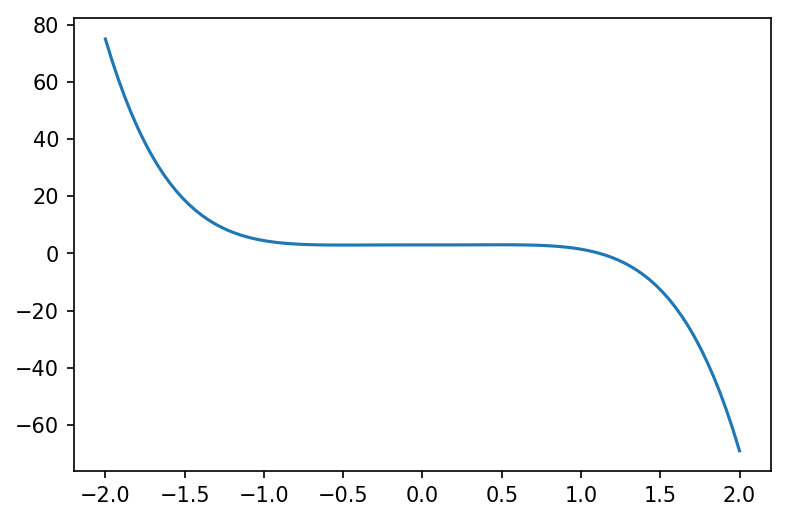

In [80]:
plt.figure(dpi=150)
plt.plot(x, poly(x));

Let's do some plotting.

In [81]:
minimize(poly, -1.0, method="Nelder-Mead", options={"maxiter": 1e3, "disp": True})

Optimization terminated successfully.
         Current function value: 2.952970
         Iterations: 15
         Function evaluations: 30


 final_simplex: (array([[-0.48994141],
       [-0.48984375]]), array([2.9529698, 2.9529698]))
           fun: 2.9529697997145945
       message: 'Optimization terminated successfully.'
          nfev: 30
           nit: 15
        status: 0
       success: True
             x: array([-0.48994141])

Sine fitting problem from last week. Let's solve it with `scipy.optimize.least_squares`:

- create callable function,
- create function for calculation of Jacobi-matrix,
- initial guess,
- compare different methods, loss functions.

In [82]:
def sin(params, x):
    return params[0] * np.sin(params[1] * x + params[2])

def sin_res(params, x, y):
    return sin(params, x) - y

In [83]:
params = [1.0, 2 * np.pi, 0.0]

x = np.r_[-2 * np.pi:2 * np.pi:500j]
y = sin(params, x) + 0.15 * np.random.randn(x.shape[0])

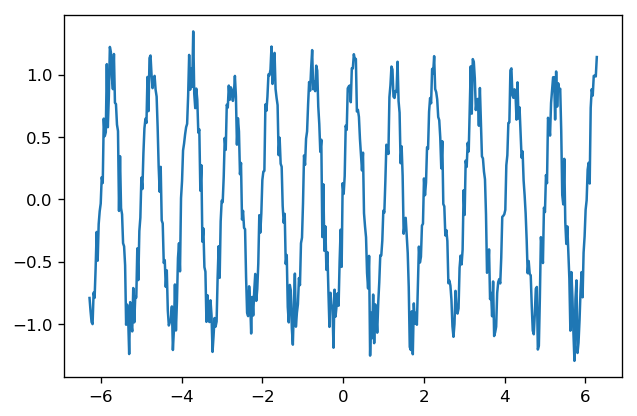

In [85]:
plt.figure(dpi=120)
plt.plot(x, y);

In [92]:
help(lsq)

Help on function least_squares in module scipy.optimize._lsq.least_squares:

least_squares(fun, x0, jac='2-point', bounds=(-inf, inf), method='trf', ftol=1e-08, xtol=1e-08, gtol=1e-08, x_scale=1.0, loss='linear', f_scale=1.0, diff_step=None, tr_solver=None, tr_options={}, jac_sparsity=None, max_nfev=None, verbose=0, args=(), kwargs={})
    Solve a nonlinear least-squares problem with bounds on the variables.
    
    Given the residuals f(x) (an m-dimensional real function of n real
    variables) and the loss function rho(s) (a scalar function), `least_squares`
    finds a local minimum of the cost function F(x)::
    
        minimize F(x) = 0.5 * sum(rho(f_i(x)**2), i = 0, ..., m - 1)
        subject to lb <= x <= ub
    
    The purpose of the loss function rho(s) is to reduce the influence of
    outliers on the solution.
    
    Parameters
    ----------
    fun : callable
        Function which computes the vector of residuals, with the signature
        ``fun(x, *args, **kwarg

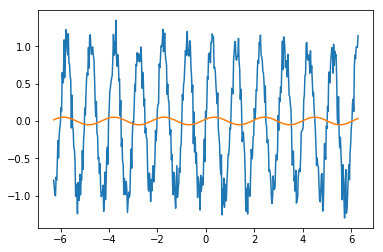

In [91]:
fit = lsq(sin_res, [2.5, 2 * np.pi * 0.5, 0.0], jac="2-point", args=(x, y), method="lm")

plt.plot(x, y, x, sin(fit.x, x));

$p_{ii} = \texttt{params[ii]}$

$f(x) = p_0 \sin(x p_1 + p_2)$

$\partial_{p_0} f(x) = \sin(x p_1 + p_2)$

$\partial_{p_1} f(x) = p_0 x \cos(x p_1 + p_2)$

$\partial_{p_2} f(x) = p_0 \cos(x p_1 + p_2)$

In [93]:
def jac(params, x, y):
    arg = x * params[1] + params[2]
    _cos = params[0] * np.cos(arg)
    
    return np.c_[np.sin(arg), x * _cos, _cos]

[-0.99733902  6.27628261 -9.42665228]


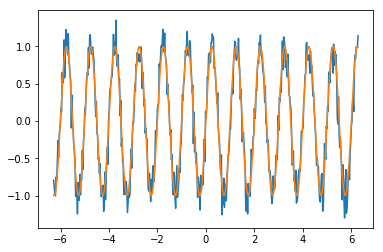

In [100]:
params_start = [1.0, 2 * np.pi * 0.95, -10.0]
fit = lsq(sin_res, params_start, jac=jac, args=(x, y), method="lm")

print(fit.x)
plt.plot(x, y, x, sin(fit.x, x));

## Interpolation

In [101]:
from scipy import interpolate as intp

### Nearest neighbour

- numpy `mgrid` - like Matlab `meshgrid`
- numpy `r_`, `c_` - quick array creation

In [38]:
help(np.mgrid)

Help on nd_grid in module numpy.lib.index_tricks object:

class nd_grid(builtins.object)
 |  nd_grid(sparse=False)
 |  
 |  Construct a multi-dimensional "meshgrid".
 |  
 |  ``grid = nd_grid()`` creates an instance which will return a mesh-grid
 |  when indexed.  The dimension and number of the output arrays are equal
 |  to the number of indexing dimensions.  If the step length is not a
 |  complex number, then the stop is not inclusive.
 |  
 |  However, if the step length is a **complex number** (e.g. 5j), then the
 |  integer part of its magnitude is interpreted as specifying the
 |  number of points to create between the start and stop values, where
 |  the stop value **is inclusive**.
 |  
 |  If instantiated with an argument of ``sparse=True``, the mesh-grid is
 |  open (or not fleshed out) so that only one-dimension of each returned
 |  argument is greater than 1.
 |  
 |  Parameters
 |  ----------
 |  sparse : bool, optional
 |      Whether the grid is sparse or not. Default 

In [102]:
y, x = np.mgrid[5:0:-1, 0:6]

In [56]:
print("x: \n", x, "\n", "y: \n", y)

x: 
 [[0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]] 
 y: 
 [[5 5 5 5 5 5]
 [4 4 4 4 4 4]
 [3 3 3 3 3 3]
 [2 2 2 2 2 2]
 [1 1 1 1 1 1]]


### Scipy's `griddata`

In [57]:
help(intp.griddata)

Help on function griddata in module scipy.interpolate.ndgriddata:

griddata(points, values, xi, method='linear', fill_value=nan, rescale=False)
    Interpolate unstructured D-dimensional data.
    
    Parameters
    ----------
    points : ndarray of floats, shape (n, D)
        Data point coordinates. Can either be an array of
        shape (n, D), or a tuple of `ndim` arrays.
    values : ndarray of float or complex, shape (n,)
        Data values.
    xi : 2-D ndarray of float or tuple of 1-D array, shape (M, D)
        Points at which to interpolate data.
    method : {'linear', 'nearest', 'cubic'}, optional
        Method of interpolation. One of
    
        ``nearest``
          return the value at the data point closest to
          the point of interpolation.  See `NearestNDInterpolator` for
          more details.
    
        ``linear``
          tessellate the input point set to n-dimensional
          simplices, and interpolate linearly on each simplex.  See
          `Li

$$ f(x, y) =  \exp\left(-\frac{(x - \mu_x)^2}{\sigma_x} - \frac{(y - \mu_y)^2}{\sigma_y}\right) $$

In [103]:
def gauss(x, y, mean=(1.0, 2.0), sigma=(1.0,1.0)):
    return np.exp(-((x - mean[0])**2 / sigma[0] + (y - mean[1])**2 / sigma[1]))

In [104]:
y, x = np.mgrid[0:10:50j, 0:10:50j]
val = gauss(x, y, mean=(6.5, 5.0), sigma=(10.0,2.5))

In [105]:
left, right, bottom, top = x.min(), x.max(), y.min(), y.max()

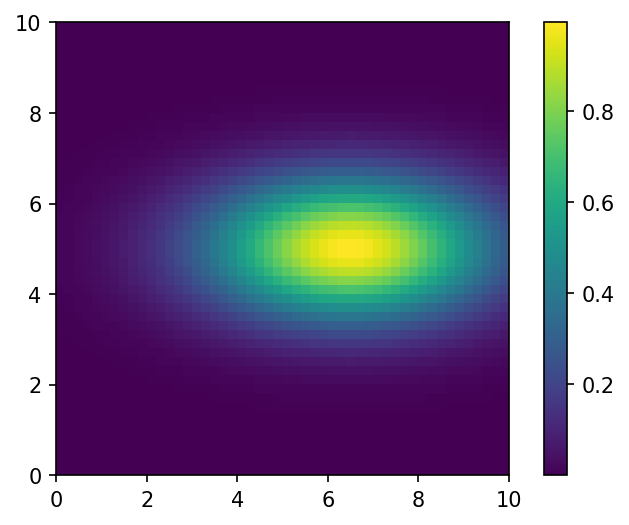

In [108]:
plt.figure(dpi=150)
plt.imshow(val, extent=(left, right, bottom, top))
plt.colorbar();

In [113]:
xr, yr = 5.0 * np.random.randn(100), 5.0 * np.random.randn(100)

In [114]:
val1 = gauss(xr, yr, mean=(6.5, 5.0), sigma=(100.0,50.0))

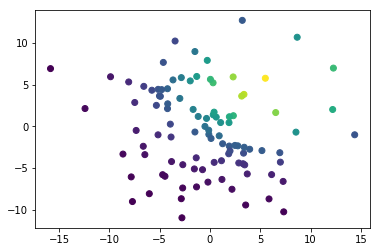

In [115]:
plt.scatter(xr, yr, c=val1);

In [116]:
xy = np.c_[xr, yr]

In [117]:
limits = (xr.min(), xr.max(), yr.min(), yr.max())

In [119]:
grid = np.mgrid[limits[0]:limits[1]:100j,limits[2]:limits[3]:100j]

In [120]:
xf, yf = grid[1].flatten(), grid[0].flatten()

In [122]:
interp = intp.griddata(xy, val1, (xf,yf), method="cubic")

In [126]:
interp.shape

(10000,)

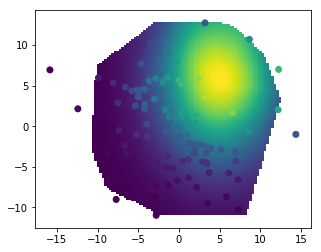

In [128]:
# plt.imshow(interp.reshape(100,100), extent=limits)
plt.imshow(np.rot90(interp.reshape(100,100)), extent=limits)
plt.scatter(xr, yr, c=val1);